<a href="https://colab.research.google.com/github/mustaphamerakech/Retail-Product-Demand-Prediction/blob/main/Retail_Product_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

df = pd.read_csv('/content/drive/My Drive/Retail-Product-Demand-Prediction/supermarket_sales - Sheet1.csv')




Mounted at /content/drive


In [7]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [9]:
df.dtypes

,0
Invoice ID,object
Branch,object
City,object
Customer type,object
Gender,object
Product line,object
Unit price,float64
Quantity,int64
Tax 5%,float64
Total,float64


In [10]:
print("shape of dataset: ",df.shape)
print("columns of dataset: ",df.columns)

shape of dataset:  (1000, 17)
columns of dataset:  Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


In [11]:
duplicated_rows = df[df.duplicated()]
print("number of duplicated rows: ",duplicated_rows.shape)

number of duplicated rows:  (0, 17)


In [12]:
print("number of missing values: \n",df.isnull().sum())

number of missing values: 
 Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [13]:
# Converting 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [17]:

# Summary of numerical columns to identify outliers
numerical_summary = df.describe()
numerical_summary


,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,0.000000,11.708825,1.71858


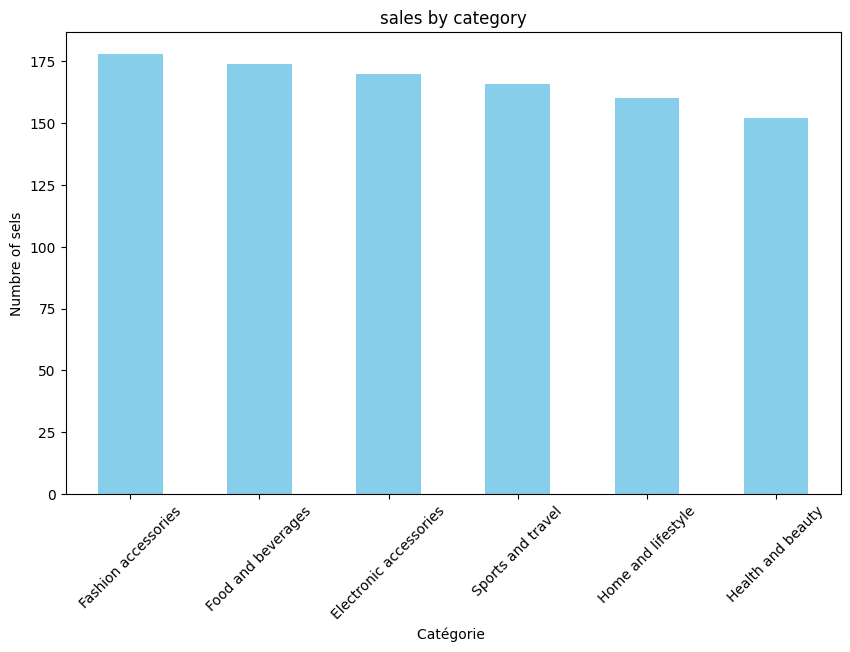

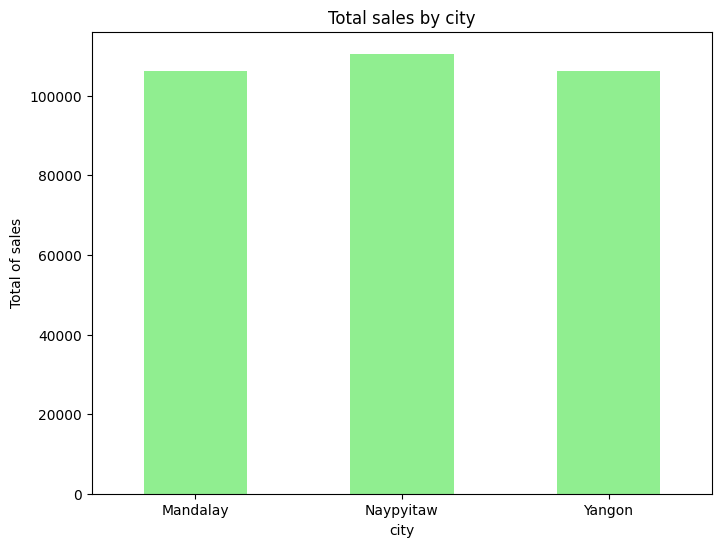

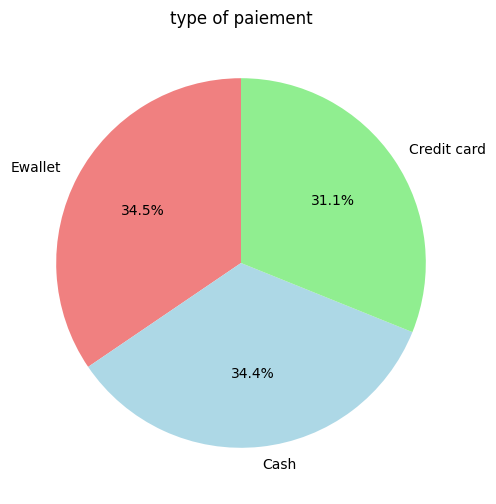

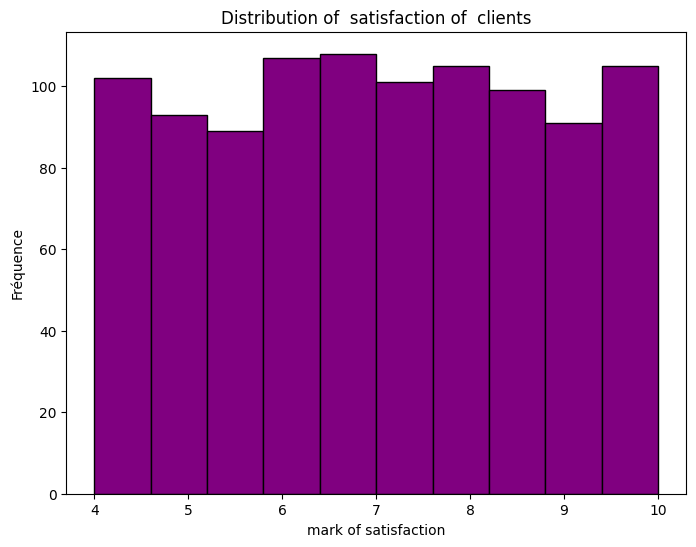

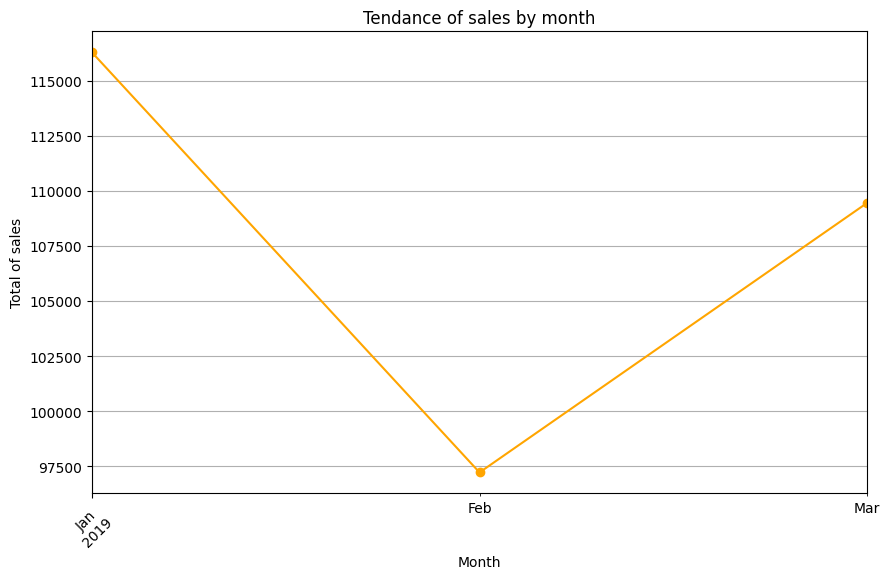

In [19]:
import matplotlib.pyplot as plt

# 1. Distribution of sales by product category
plt.figure(figsize=(10, 6))
df['Product line'].value_counts().plot(kind='bar', color='skyblue')
plt.title('sales by category')
plt.xlabel('Catégorie ')
plt.ylabel('Numbre of sels')
plt.xticks(rotation=45)
plt.show()

# 2. sales by city
plt.figure(figsize=(8, 6))
df.groupby('City')['Total'].sum().plot(kind='bar', color='lightgreen')
plt.title('Total sales by city')
plt.xlabel('city')
plt.ylabel('Total of sales')
plt.xticks(rotation=0)
plt.show()

# 3. type of paiement
plt.figure(figsize=(8, 6))
df['Payment'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('type of paiement')
plt.ylabel('')
plt.show()
# 4. Satisfaction Rating Histogram
plt.figure(figsize=(8, 6))
df['Rating'].plot(kind='hist', bins=10, color='purple', edgecolor='black')
plt.title('Distribution of  satisfaction of  clients')
plt.xlabel('mark of satisfaction')
plt.ylabel('Fréquence')
plt.show()

# 5. monthly sales trend
# Extracting month and year from 'Date' column
df['Month_Year'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month_Year')['Total'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='orange')
plt.title('Tendance of sales by month')
plt.xlabel('Month')
plt.ylabel('Total of sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


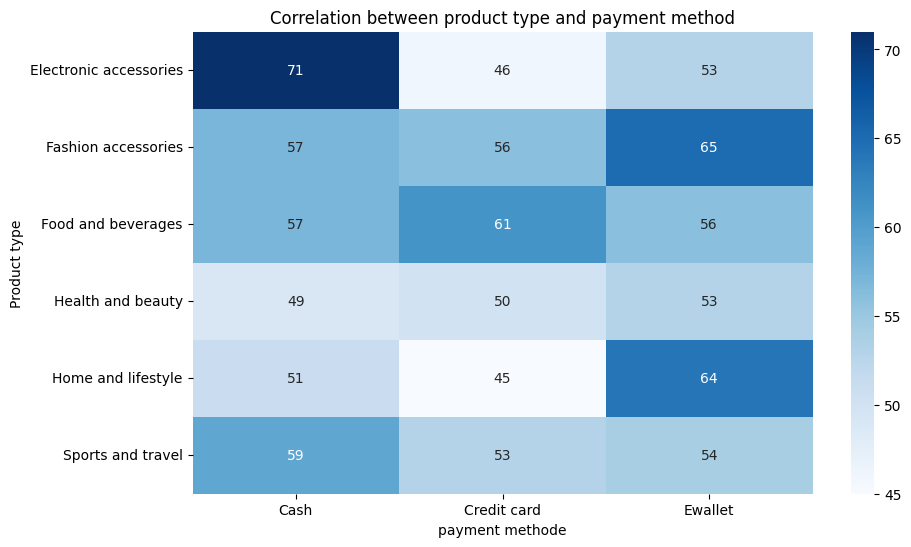

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

#Creating a crosstab to show payment method breakdown by product type

product_payment = pd.crosstab(df['Product line'], df['Payment'])

# Visualisation avec un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(product_payment, annot=True, fmt='d', cmap='Blues')
plt.title('Correlation between product type and payment method')
plt.xlabel('payment methode')
plt.ylabel('Product type')
plt.show()


<ipython-input-25-fd9b79b369d2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='City', y='Rating', data=df, palette='Set2')


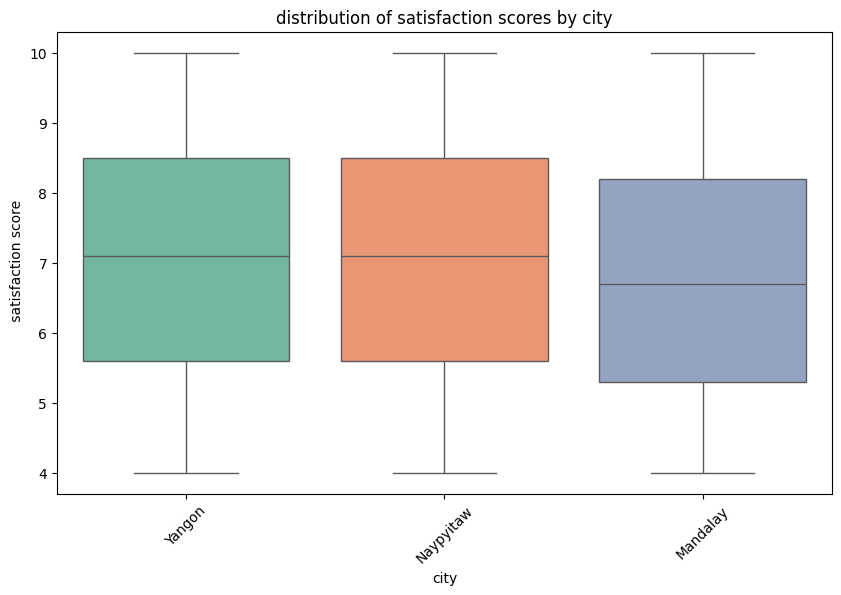

<ipython-input-25-fd9b79b369d2>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product line', y='Rating', data=df, palette='Set3')


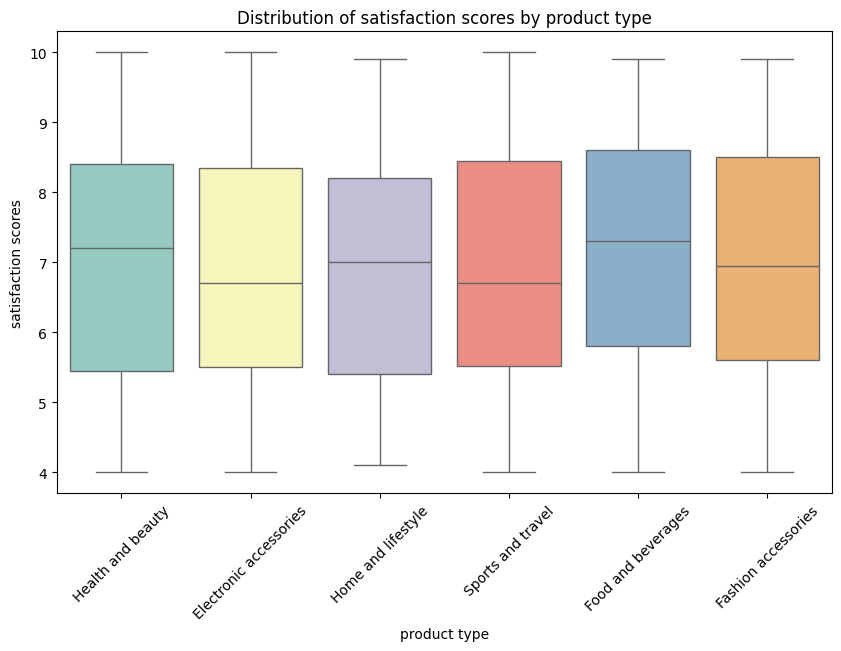

In [25]:
# Boxplot to show the distribution of satisfaction scores by city
plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='Rating', data=df, palette='Set2')
plt.title('distribution of satisfaction scores by city')
plt.xlabel('city')
plt.ylabel(' satisfaction score')
plt.xticks(rotation=45)
plt.show()

# Boxplot to show the distribution of satisfaction scores by product type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product line', y='Rating', data=df, palette='Set3')
plt.title('Distribution of satisfaction scores by product type')
plt.xlabel('product type')
plt.ylabel('satisfaction scores')
plt.xticks(rotation=45)
plt.show()


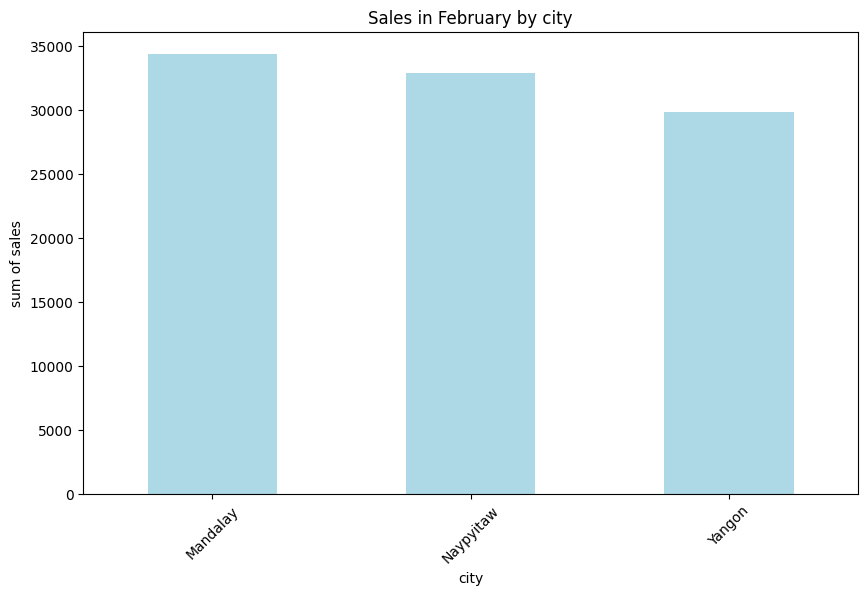

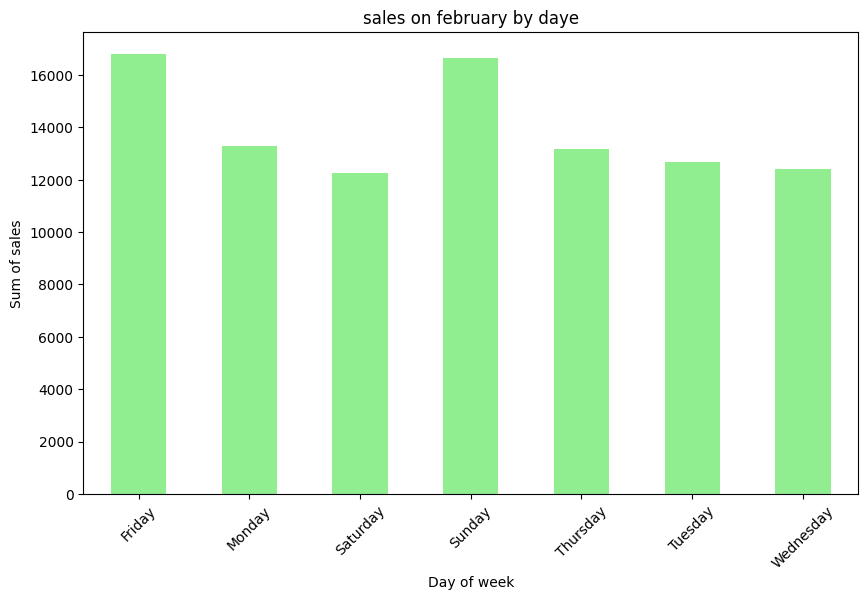

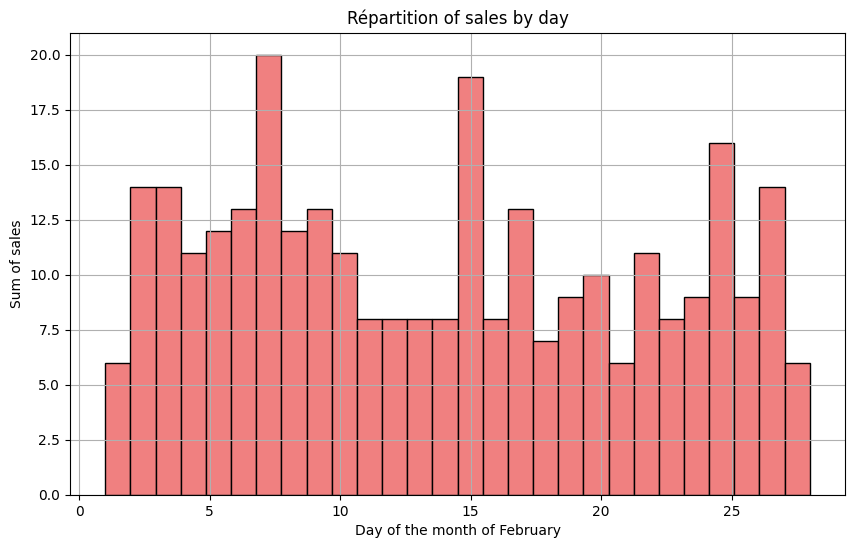

In [26]:
#Convert 'Date' column to datetime if not done
df['Date'] = pd.to_datetime(df['Date'])

# Extract day of week and season
df['Day_of_Week'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month

# Add a column to identify the season (winter for February in this example)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(get_season)

# Filter February data
february_sales = df[df['Month'] == 2]
# Sales in February by city
plt.figure(figsize=(10, 6))
february_sales.groupby('City')['Total'].sum().plot(kind='bar', color='lightblue')
plt.title('Sales in February by city')
plt.xlabel('city')
plt.ylabel('sum of sales')
plt.xticks(rotation=45)
plt.show()

# sales on february by daye
plt.figure(figsize=(10, 6))
february_sales.groupby('Day_of_Week')['Total'].sum().plot(kind='bar', color='lightgreen')
plt.title('sales on february by daye')
plt.xlabel('Day of week')
plt.ylabel('Sum of sales')
plt.xticks(rotation=45)
plt.show()

# February sales by day of the month to see if any holidays had an impact
plt.figure(figsize=(10, 6))
february_sales['Date'].dt.day.plot(kind='hist', bins=28, color='lightcoral', edgecolor='black')
plt.title('Répartition of sales by day')
plt.xlabel('Day of the month of February')
plt.ylabel('Sum of sales')
plt.grid(True)
plt.show()


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
# Align columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


Mean Squared Error: 2.164970301179465e-08
Mean Absolute Error: 8.746177308153117e-05
R-squared: 0.9999999999996406


In [25]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 8.746177308153117e-05


In [27]:
# Prétraitement de l'ensemble de validation
X_val = pd.get_dummies(X_val)
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)  # Alignement des colonnes

# Faire des prédictions sur l'ensemble de validation
y_val_pred = model.predict(X_val)

# Évaluer le modèle sur l'ensemble de validation
mse_val = mean_squared_error(y_val, y_val_pred)
print(f'Mean Squared Error sur l\'ensemble de validation: {mse_val}')

# Afficher les prédictions pour la demande future
print('Prédictions de la demande future:', y_val_pred)


Mean Squared Error sur l'ensemble de validation: 1.9607278197525818e-08
Prédictions de la demande future: [  55.881       932.337       867.615        77.931       226.06475247
  145.068       104.832       510.615        84.9765      270.58475247
  130.032       175.014       212.7825      174.29975247  145.5825
  856.4535      881.307       258.678       793.54775247  101.64
  348.30575247  637.728       189.0945      922.635       395.892
  295.6905      836.304       742.2975      269.535        94.185
  235.2105      523.971       246.67625247  423.738       525.231
  627.6165      324.2925       40.53        166.005       667.38
   33.93575247  609.168        33.35825247  458.69225247  429.16625247
  463.42775247  270.01775247  345.786        30.996       131.20775247
   45.927       130.8825       96.1905      202.335       259.77
  441.588        37.611       441.756        84.75575247  722.232
  131.922       176.925       450.10325247  391.419      1002.12
  381.39125247   93